In [3]:
import pandas as pd
import numpy as np

In [14]:
Onlineretail = pd.read_csv("C:\\Users\\Amisha\\Desktop\\etl-pipeline\\OnlineRetail.csv", encoding='iso-8859-1')

In [16]:
Onlineretail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
Onlineretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
Onlineretail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
Onlineretail['Description'].nunique()

4223

In [20]:
Onlineretail.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

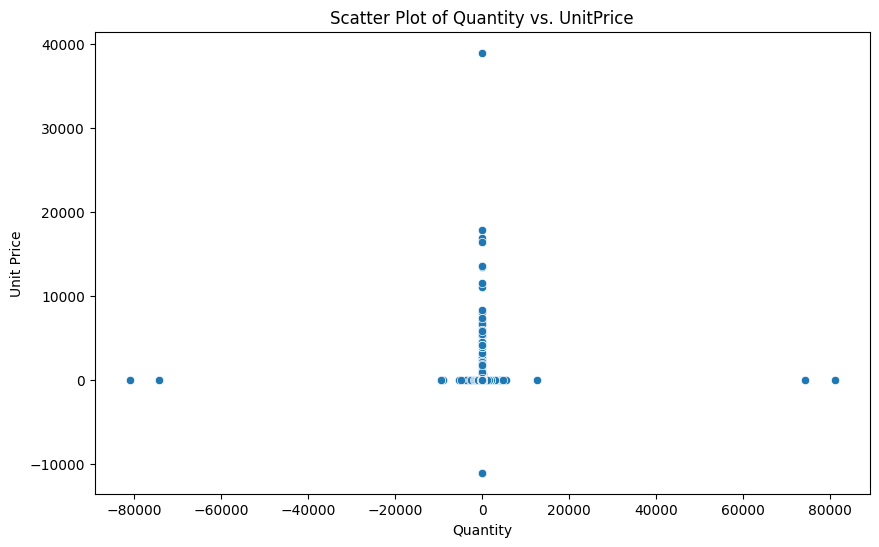

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Quantity vs. UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Onlineretail, x='Quantity', y='UnitPrice')
plt.title('Scatter Plot of Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()


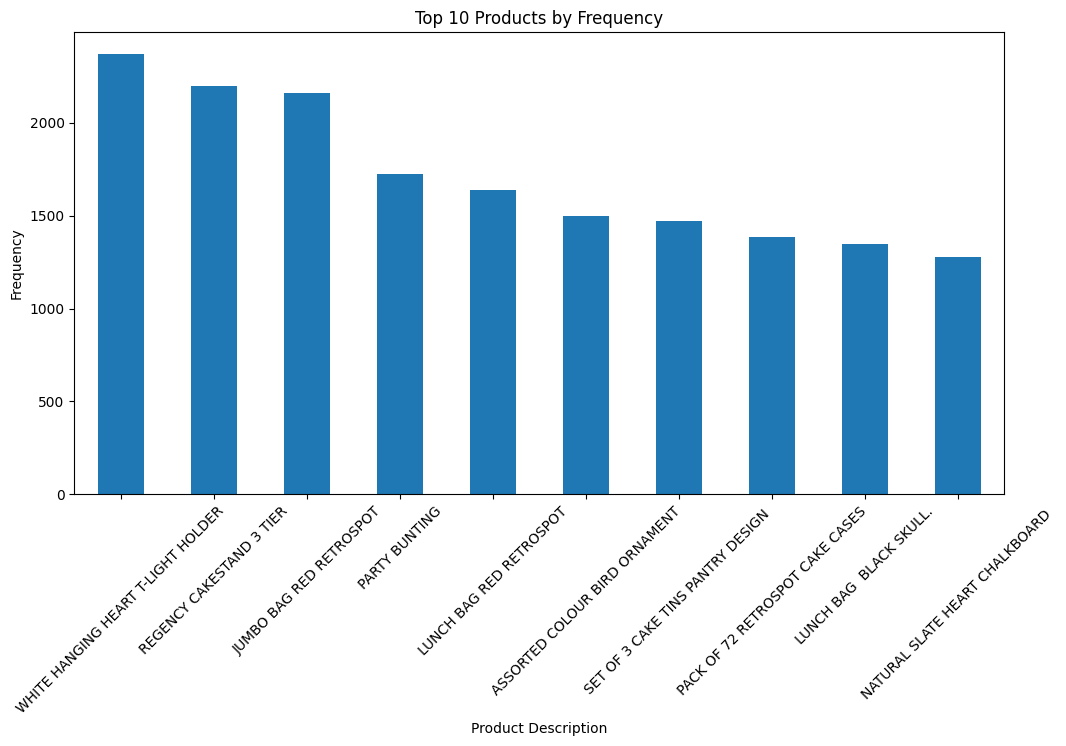

In [25]:
# Assuming you want to plot the top N products by frequency
top_n = 10  # Number of top products to display

top_products = Onlineretail['Description'].value_counts().head(top_n)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title(f'Top {top_n} Products by Frequency')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




In [27]:

numerical_cols = ['Quantity', 'UnitPrice']
z_scores = np.abs((Onlineretail[numerical_cols] - Onlineretail[numerical_cols].mean()) / Onlineretail[numerical_cols].std())

threshold = 3

anomalous_rows = z_scores[z_scores > threshold].any(axis=1)

# Display the anomalous rows
anomalous_data = Onlineretail[anomalous_rows]
print(anomalous_data)


       InvoiceNo StockCode                          Description  Quantity  \
1814      536544       DOT                       DOTCOM POSTAGE         1   
3041      536592       DOT                       DOTCOM POSTAGE         1   
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
4850      536809     84950       ASSORTED COLOUR T-LIGHT HOLDER      1824   
4945      536830     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   
...          ...       ...                                  ...       ...   
540071    581459     22197                       POPCORN HOLDER      1200   
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   
540908    581492       DOT                       DOTCOM POSTAGE         1   
541540    581498       DOT                       DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
1814    12